In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
cfg_file=r"C:\Users\agaki\Downloads\yolov3.cfg"
weight_file=r"C:\Users\agaki\Downloads\yolov3.weights"
names_file=r"C:\Users\agaki\Downloads\coco.names"

In [3]:
net=cv2.dnn.readNet(weight_file, cfg_file)

In [4]:
with open(names_file,'r')as f:
    classes=f.read().strip().split('\n')

In [5]:
image_path=r"C:\Users\agaki\Downloads\hit3.jpg"
image=cv2.imread(image_path)

In [6]:
if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

In [7]:
height, width=image.shape[:2]

In [8]:
blob=cv2.dnn.blobFromImage(image,1/255.0,(416,416),swapRB=True,crop=False)
net.setInput(blob)

In [9]:
layer_names=net.getUnconnectedOutLayersNames()

In [10]:
outs=net.forward(layer_names)

In [11]:
class_ids=[]
confidences=[]
boxes=[]

In [12]:
conf_threshold=0.5

In [13]:
for out in outs:
    for detection in out:
        scores=detection[5:]
        class_id=np.argmax(scores)
        confidence=scores[class_id]
        if confidence>conf_threshold:
            
            center_x=int(detection[0]*width)
            center_y=int(detection[1]*height)
            w=int(detection[2]*width)
            h=int(detection[3]*height)

            
            x=int(center_x-w/2)
            y=int(center_y-h/2)

            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x,y,w,h])

In [14]:
nms_threshold = 0.4
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

In [15]:
for i in indices.flatten():
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    confidence = confidences[i]
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image, f'{label} {confidence:.2f}', (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

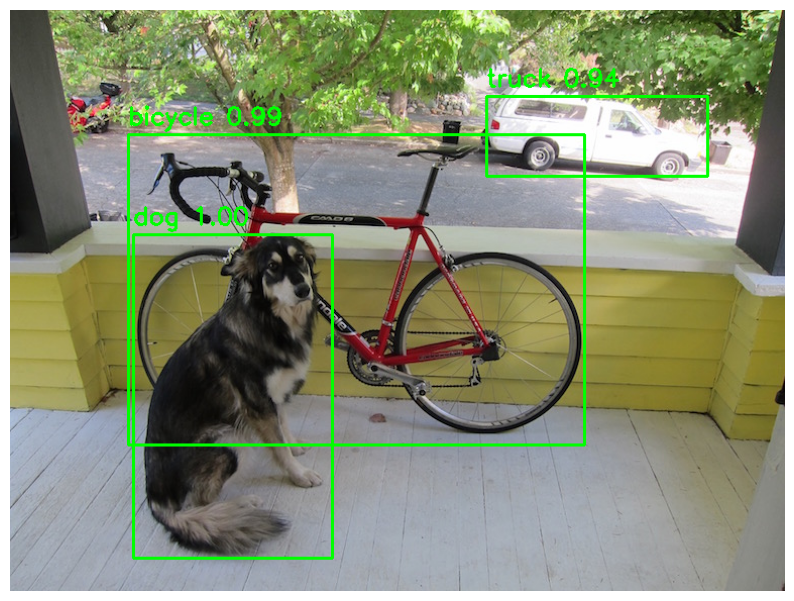

In [16]:
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()